In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/steel_data.csv", sep=';', decimal=',', index_col=0)

In [3]:
df.head()

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,...,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,29.0,45.366667,24.400000,41.033333,NaN,0.456460,...,0.12,2.6,NaN,NaN,53.4,1.0,5.8,0.15,2.6,NaN
1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,26.0,44.066667,13.866667,44.066667,NaN,0.359285,...,0.14,2.2,NaN,NaN,59.3,0.6,4.1,0.11,2.3,NaN
2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,24.0,43.350000,17.950000,43.350000,NaN,0.331665,...,0.12,2.6,NaN,NaN,57.2,0.5,8.1,0.13,2.3,NaN
3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,17.0,46.183333,19.816667,46.183333,NaN,0.377945,...,0.11,2.4,NaN,NaN,60.3,0.5,6.3,0.12,2.6,NaN
4,г683863<889,2070-06-21 03:50:00,Э76ХФ,Р65,20.0,48.500000,17.033333,48.500000,NaN,0.389875,...,0.12,2.4,NaN,NaN,60.3,0.6,4.5,0.09,2.5,NaN


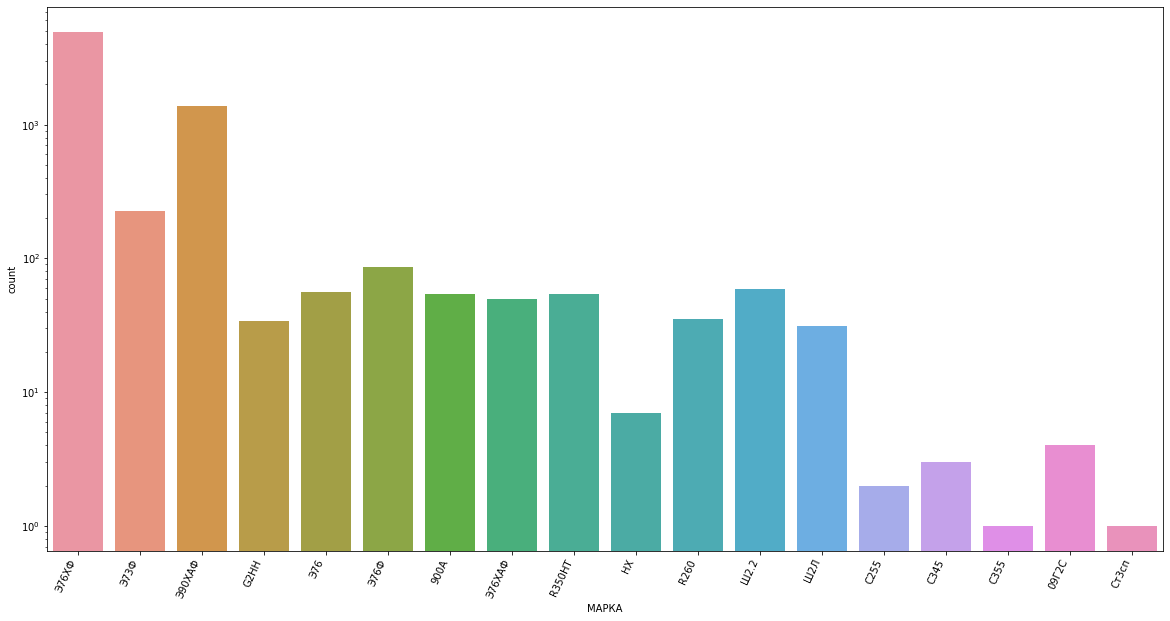

In [4]:
# the most popular mark of steel
plt.figure(figsize=(20,10))
chart = sns.countplot(df.iloc[:,2])
chart.set_yscale('log')
ch = chart.set_xticklabels(chart.get_xticklabels(), rotation=65, horizontalalignment='right')

In [5]:
counts = df.iloc[:, 2].value_counts()
predict_label = counts.index[counts.argmax()]
predict_label

'Э76ХФ'

In [6]:
# EDA Analysis
edadf = df[df.iloc[:,2] == predict_label]
edadf.describe()

,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,...,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
count,4432.000000,4429.000000,4429.000000,4432.000000,3590.000000,4426.000000,4417.000000,4423.000000,4423.000000,4414.000000,...,4432.000000,4432.000000,3264.000000,3264.000000,4432.000000,4432.000000,4431.000000,4432.000000,4432.000000,3264.000000
mean,25.796480,45.746741,20.743185,45.666975,2.980263,0.376102,0.125202,0.133946,0.137098,0.039700,...,0.198745,2.408461,22.753585,4.532966,56.501467,0.584477,9.022997,0.120095,2.360023,24.037224
std,14.464647,10.003356,4.582612,9.692703,0.732132,0.076308,0.027272,0.048963,0.038942,0.001596,...,0.205323,0.317422,2.380670,0.956452,3.755923,0.212534,3.171062,0.058101,0.223392,2.177684
min,0.000000,4.683333,2.816667,4.683333,1.000000,0.007000,0.005630,0.000356,0.014973,0.002965,...,0.050000,1.300000,10.400000,2.400000,35.900000,0.100000,0.300000,0.040000,1.700000,16.400000
25%,13.000000,42.016667,17.750000,42.000000,2.521265,0.328995,0.108297,0.100696,0.111297,0.038892,...,0.100000,2.200000,21.300000,3.900000,54.400000,0.400000,6.700000,0.080000,2.200000,22.300000
50%,25.000000,44.166667,20.216667,44.058333,3.000000,0.377394,0.125840,0.133436,0.134313,0.039631,...,0.140000,2.400000,22.800000,4.400000,56.900000,0.600000,8.900000,0.110000,2.300000,24.600000
75%,36.000000,47.033333,23.016667,47.016667,3.479626,0.428080,0.143510,0.167048,0.158523,0.040402,...,0.210000,2.600000,24.600000,5.100000,58.900000,0.700000,11.300000,0.140000,2.500000,25.900000
max,91.000000,294.083333,67.583333,251.000000,6.702208,0.728360,0.291657,0.360707,0.478882,0.076948,...,4.200000,5.100000,32.800000,14.200000,67.500000,2.300000,32.400000,1.450000,3.100000,28.600000


In [7]:
# 1. NaN
print(edadf.shape)
nan_ratio = (~edadf.notna()).mean(axis=0)
display(nan_ratio)
features_to_drop = nan_ratio > .6
display(features_to_drop.sum())

(4953, 84)


nplv                      0.000000
DT                        0.000000
МАРКА                     0.000000
ПРОФИЛЬ                   0.000000
t вып-обр                 0.105189
                            ...   
химшлак последний FeO     0.105189
химшлак последний MgO     0.105391
химшлак последний MnO     0.105189
химшлак последний R       0.105189
химшлак последний SiO2    0.341005
Length: 84, dtype: float64

10

In [8]:
feautres_to_drop_names = edadf.columns[features_to_drop]
display(feautres_to_drop_names)
edadf = edadf.drop(feautres_to_drop_names, axis=1)

Index(['N2 (интенс.)', 'расход газ  N2', 'расход C пров.', 'сыпуч кварцит',
       'сыпуч  кокс. мелочь (сух.)', 'ферспл FeMo', 'ферспл FeSi-75',
       'ферспл FeV азот.', 'ферспл  Ni H1 пласт.', 'ферспл  ферванит'],
      dtype='object')

In [9]:
# 2. Zeros
edadf.fillna(0, inplace=True)
display(edadf)

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,...,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,29.0,45.366667,24.400000,41.033333,0.000000,0.456460,...,0.12,2.6,0.0,0.0,53.4,1.0,5.8,0.15,2.6,0.0
1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,26.0,44.066667,13.866667,44.066667,0.000000,0.359285,...,0.14,2.2,0.0,0.0,59.3,0.6,4.1,0.11,2.3,0.0
2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,24.0,43.350000,17.950000,43.350000,0.000000,0.331665,...,0.12,2.6,0.0,0.0,57.2,0.5,8.1,0.13,2.3,0.0
3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,17.0,46.183333,19.816667,46.183333,0.000000,0.377945,...,0.11,2.4,0.0,0.0,60.3,0.5,6.3,0.12,2.6,0.0
4,г683863<889,2070-06-21 03:50:00,Э76ХФ,Р65,20.0,48.500000,17.033333,48.500000,0.000000,0.389875,...,0.12,2.4,0.0,0.0,60.3,0.6,4.5,0.09,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,г68386398;7,2071-04-21 06:55:00,Э76ХФ,Р65,33.0,42.200000,17.850000,42.200000,4.000000,0.471755,...,0.63,2.1,25.2,6.6,56.1,0.9,7.0,0.18,2.3,24.6
7023,г68386398;8,2071-04-21 07:46:00,Э76ХФ,Р65,34.0,42.050000,18.533333,42.050000,2.689759,0.465055,...,0.20,2.5,20.4,5.0,57.5,0.3,9.9,0.16,2.5,23.4
7024,г68386398;9,2071-04-21 08:58:00,Э76ХФ,Р65,13.0,47.850000,20.750000,47.850000,3.000000,0.470500,...,0.13,2.4,22.4,6.2,58.0,0.6,7.1,0.12,2.3,25.2
7025,г68386398;:,2071-04-21 09:57:00,Э76ХФ,Р65,14.0,40.683333,18.633333,40.683333,3.754131,0.452055,...,0.24,2.4,22.6,5.4,52.1,0.7,9.9,0.16,2.3,22.9


In [10]:
zeros_mean = (edadf == 0).mean(axis=1)
zeros_mask = (zeros_mean >= .5)
print(f"Number of zeros values = {zeros_mask.sum()}")

Number of zeros values = 521


In [11]:
edadf = edadf[~zeros_mask]

In [12]:
# 3. Std and dispersion
STD = edadf.std(axis=0)
DISPERSION = STD*STD
display(STD)
drop_columns = DISPERSION.axes[0][DISPERSION.values == 0].values
# DISPERSION[target_features]

t вып-обр                 14.464647
t обработка               10.070517
t под током                4.612726
t продувка                 9.692703
ПСН гр.                    1.342127
                            ...    
химшлак последний FeO      0.212534
химшлак последний MgO      3.173599
химшлак последний MnO      0.058101
химшлак последний R        0.223392
химшлак последний SiO2    10.754439
Length: 70, dtype: float64

In [13]:
# 4. Outliers
Q1 = edadf.quantile(1/4)
Q3 = edadf.quantile(3/4)
IQR = Q3-Q1
IQR

t вып-обр                 23.000000
t обработка                5.016667
t под током                5.283333
t продувка                 5.016667
ПСН гр.                    1.364966
                            ...    
химшлак последний FeO      0.300000
химшлак последний MgO      4.600000
химшлак последний MnO      0.060000
химшлак последний R        0.300000
химшлак последний SiO2    25.600000
Length: 70, dtype: float64

In [14]:
print(edadf.shape)
eda_mask = (((edadf < (Q1 - 1.5 * IQR))|(edadf > (Q3 + 1.5 * IQR))).any(axis=1))
n_eda = edadf[eda_mask]
print(n_eda.shape)
print(f"Number of outliers = {(~eda_mask).sum()}")

(4432, 74)
(3375, 74)
Number of outliers = 1057


In [15]:
df = df.drop(feautres_to_drop_names, axis=1)
df = df.drop(drop_columns, axis=1)

In [17]:
def zero_filter(ddf):
    ddf.fillna(0, inplace=True)
    zeros_mean = (ddf == 0).mean(axis=1)
    zeros_mask = (zeros_mean >= .8)
    return ddf[~zeros_mask]

def IQR_filter(ddf):
    Q1 = ddf.quantile(1/4)
    Q3 = ddf.quantile(3/4)
    IQR = Q3-Q1
    ddf_mask = (((ddf < (Q1 - 1.5 * IQR))|(ddf > (Q3 + 1.5 * IQR))).any(axis=1))
    return ddf[ddf_mask]

def all_filter(data_frame, filt_index):
    markers = pd.unique(data_frame.iloc[:, filt_index])
    new_df = data_frame.iloc[0:0]
    count = data_frame.shape[0]
    for marker in markers:
        ddf = data_frame[data_frame.iloc[:, filt_index] == marker]
        ddf.fillna(0, inplace=True)
        # if marker != predict_label:
        #     ddf = zero_filter(ddf)
        #     ddf = IQR_filter(ddf)
        new_df = new_df.append(ddf)
    count -= new_df.shape[0]
    return new_df.reset_index(drop=True), count

In [18]:
ddf, count = all_filter(df, 2)
print(count)

0


In [19]:
a = df.loc[6787].fillna(0)
ddf = ddf.append(a);

In [20]:
(ddf[ddf['МАРКА'] == predict_label].shape)
(ddf.shape)

(7042, 72)

In [21]:
ddf.columns
target_features = np.array(['химшлак последний SiO2', 'химшлак последний R','химшлак последний CaO','химшлак последний Al2O3'][::-1])

In [22]:
ddf.drop(['nplv', 'DT'], axis=1, inplace=True);

In [23]:
itarget_features = ddf.columns.get_indexer(target_features)
itarget_features

array([63, 64, 68, 69], dtype=int64)

In [24]:
ddf.columns

Index(['МАРКА', 'ПРОФИЛЬ', 't вып-обр', 't обработка', 't под током',
       't продувка', 'ПСН гр.', 'чист расход C', 'чист расход Cr',
       'чист расход Mn', 'чист расход Si', 'чист расход V',
       'температура первая', 'температура последняя', 'Ar (интенс.)',
       'эл. энергия (интенс.)', 'произв жидкая сталь',
       'произв количество обработок', 'расход газ Ar', 'сыпуч известь РП',
       'сыпуч кокс пыль УСТК', 'сыпуч  кокс. мелочь КМ1', 'сыпуч  шпат плав.',
       'ферспл CaC2', 'ферспл  FeV-80', 'ферспл  Mn5Si65Al0.5',
       'ферспл SiMn18', 'ферспл  фх850А', 'эл. энергия',
       'химсталь первый Al_1', 'химсталь первый C_1', 'химсталь первый Cr_1',
       'химсталь первый Cu_1', 'химсталь первый Mn_1', 'химсталь первый Mo_1',
       'химсталь первый N_1', 'химсталь первый Ni_1', 'химсталь первый P_1',
       'химсталь первый S_1', 'химсталь первый Si_1', 'химсталь первый Ti_1',
       'химсталь первый V_1', 'химсталь последний Al', 'химсталь последний C',
       'химс

In [25]:
# metrics and stuff
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

In [26]:
# models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [27]:
ddf.head()

,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,...,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,Э76ХФ,Р65,29.0,45.366667,24.400000,41.033333,0.0,0.456460,0.059572,0.117446,...,0.12,2.6,0.0,0.0,53.4,1.0,5.8,0.15,2.6,0.0
1,Э76ХФ,Р65,26.0,44.066667,13.866667,44.066667,0.0,0.359285,0.083738,0.160923,...,0.14,2.2,0.0,0.0,59.3,0.6,4.1,0.11,2.3,0.0
2,Э76ХФ,Р65,24.0,43.350000,17.950000,43.350000,0.0,0.331665,0.081490,0.132332,...,0.12,2.6,0.0,0.0,57.2,0.5,8.1,0.13,2.3,0.0
3,Э76ХФ,Р65,17.0,46.183333,19.816667,46.183333,0.0,0.377945,0.133194,0.221605,...,0.11,2.4,0.0,0.0,60.3,0.5,6.3,0.12,2.6,0.0
4,Э76ХФ,Р65,20.0,48.500000,17.033333,48.500000,0.0,0.389875,0.105094,0.169459,...,0.12,2.4,0.0,0.0,60.3,0.6,4.5,0.09,2.5,0.0


In [28]:
scoring = {
    'r^2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error),
    }
x_features = np.arange(0, ddf.shape[1])
x_features = x_features[np.isin(x_features, itarget_features, invert=True)]
X_m = ddf.iloc[:, x_features].values
y = ddf.iloc[:, itarget_features].values
X_m.shape

(7042, 66)

In [29]:
def test_model(model, X_, y_, cv_, show=False):
    results = []
    for i in range(0, y_.shape[1]):
        rs = cross_validate(model, X_, y_[:,i], cv=cv_, scoring=scoring)
        results.append(pd.DataFrame.from_dict(rs))
        if show:
            display(results[i])
    return results

def score_table(results):
    r = np.array(list(map(lambda x: x.mean(), results)))
    cross_table = pd.DataFrame(r, index=target_features, columns=results[0].columns)
    return cross_table

In [30]:
x_features = np.arange(0, ddf.shape[1])
x_features = x_features[np.isin(x_features, itarget_features, invert=True)]
X_m = ddf.iloc[:, x_features]
y_n = ddf.iloc[:, itarget_features].values
X_w_marks = X_m.iloc[:, 1:]
X_train_mask = X_m.iloc[:,0] != predict_label
X_test_mask = X_m.iloc[:,0] == predict_label

In [31]:
idx = np.arange(0, X_w_marks.shape[1])
cat_features_pred = np.array([0,],dtype=np.int32)
num_features_pred = idx[np.isin(idx, cat_features_pred, invert=True)]
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features_pred),
    # ('cat', OneHotEncoder(), cat_features_pred)
])

X_n = preprocessor.fit_transform(X_w_marks)
X_n.shape

(7042, 64)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train = X_n[X_train_mask.values]
X_test = X_n[X_test_mask.values]
Y_train = y_n[X_train_mask.values]
Y_test = y_n[X_test_mask.values]
X_train_add, X_valid, Y_train_add, Y_valid = train_test_split(X_test, Y_test, test_size=.2, random_state=223)
X_train_extended = np.concatenate((X_train, X_train_add), axis=0)
Y_train_extended = np.concatenate((Y_train, Y_train_add), axis=0)

In [34]:
def sup_test(model, X_train, Y_train, X_valid, Y_valid, index=target_features):
    rs = {'r2':[], 'mae':[], 'mse':[]}
    for i in range(0, Y_train.shape[1]):
        model.fit(X_train, Y_train[:,i])
        preds = model.predict(X_valid)
        rs['r2'].append(r2_score(Y_valid[:,i], preds))
        rs['mae'].append(mean_absolute_error(Y_valid[:,i], preds))
        rs['mse'].append(mean_squared_error(Y_valid[:,i], preds))

    return pd.DataFrame(rs, index=index)

In [35]:
RF1_1 = Pipeline([
    ('reg', RandomForestRegressor(
        n_estimators=100, 
        max_features=X_n.shape[1]//3, 
        random_state=4
        ))
])

In [36]:
# sup_test(RF1_1, X_train_extended, Y_train_extended, X_valid, Y_valid)

In [37]:
sup_test(RF1_1, X_train, Y_train, X_valid, Y_valid)

,r2,mae,mse
химшлак последний Al2O3,0.947257,0.316061,0.268563
химшлак последний CaO,0.967112,2.355574,10.121855
химшлак последний R,0.961636,0.111054,0.021414
химшлак последний SiO2,0.981723,1.039984,2.435189


In [38]:
# sup_test(RF1_1, X_n, y_n, X_valid, Y_valid)

In [42]:
sup_test(RF1_1, X_train, Y_train, X_test, Y_test)

,r2,mae,mse
химшлак последний Al2O3,0.934966,0.339082,0.339486
химшлак последний CaO,0.969490,2.275124,9.552919
химшлак последний R,0.960450,0.114436,0.022500
химшлак последний SiO2,0.981592,1.052945,2.447605


In [43]:
# sup_test(RF1_1, X_train_extended, Y_train_extended, X_train_extended, Y_train_extended)

In [44]:
# sup_test(RF1_1, X_train_extended, Y_train_extended, X_test, Y_test)

In [45]:
# sup_test(RF1_1, X_train, Y_train, X_train, Y_train)

In [46]:
y_indexes = [1,2]

RF1_2 = Pipeline([
    ('reg', RandomForestRegressor(
        n_estimators=400, 
        max_features=X_n.shape[1]//3, 
        random_state=6
        ))
])

EN1_1 = ElasticNet(alpha=.5, l1_ratio=.2)

In [47]:
display(sup_test(RF1_2, X_train, Y_train[:, y_indexes], X_test, Y_test[:, y_indexes], index=target_features[y_indexes]))
sup_test(RF1_2, X_train_extended, Y_train_extended[:, y_indexes], X_valid, Y_valid[:, y_indexes], index=target_features[y_indexes])

,r2,mae,mse
химшлак последний CaO,0.969789,2.266118,9.459091
химшлак последний R,0.961013,0.113940,0.022179


,r2,mae,mse
химшлак последний CaO,0.967919,2.259604,9.873482
химшлак последний R,0.966611,0.101125,0.018637


In [48]:
display(sup_test(EN1_1, X_train, Y_train[:, y_indexes], X_test, Y_test[:, y_indexes], index=target_features[y_indexes]))
sup_test(EN1_1, X_train_extended, Y_train_extended[:, y_indexes], X_valid, Y_valid[:, y_indexes], index=target_features[y_indexes])

,r2,mae,mse
химшлак последний CaO,0.953591,3.166470,14.530792
химшлак последний R,0.793681,0.239194,0.117373


,r2,mae,mse
химшлак последний CaO,0.957709,2.783658,13.015643
химшлак последний R,0.906368,0.185974,0.052264


# Итоги
0\) Наиболее популярная марка стали "Э76ХФ"

1\) Признаки 'N2 (интенс.)', 'расход газ  N2', 'расход C пров.', 'сыпуч кварцит', 'сыпуч  кокс. мелочь (сух.)', 'ферспл FeMo', 'ферспл FeSi-75', 'ферспл FeV азот.', 'ферспл  Ni H1 пласт.', 'ферспл  ферванит' более чем на 60% из NaN.

2\) 521 нулевых строк в датасете с наиболее популярной маркой стали

3\) 1057 строк в датасете с наиболее популярной маркой стали были выбросами

4\) Признаки 'произв  количество плавок', 'произв количество плавок (цел)' имели 0 дисперсию

Метрики для целевых переменных для модели RandomForest, обченой на X_train, Y_train

Тесты проводились на X_test, Y_test


|							|        r2|       mae|       mse|
|---------------------------|----------|----------|----------|
|химшлак последний Al2O3	|  0.934966|  0.339082|  0.339486|
|---------------------------|----------|----------|----------|
|химшлак последний CaO		|  0.969490|  2.275124|  9.552919|
|---------------------------|----------|----------|----------|
|химшлак последний R		|  0.960450|  0.114436|  0.022500|
|---------------------------|----------|----------|----------|
|химшлак последний SiO2	    |  0.981592|  1.052945|  2.447605|

In [50]:
def predict(model, X_train, Y_train, X_pred, labels=target_features):
    data = pd.DataFrame(columns=labels)
    for i in range(0, Y_train.shape[1]):
        model.fit(X_train, Y_train[:,i])
        preds = model.predict(X_pred)
        data.iloc[:, i] = preds
    return data

In [53]:
data = predict(RF1_2, X_train, Y_train, X_test)
display(data)


,химшлак последний Al2O3,химшлак последний CaO,химшлак последний R,химшлак последний SiO2
0,0.03700,58.98425,2.44625,0.05950
1,0.02050,58.63500,2.46625,0.12350
2,0.00975,57.15700,2.42850,0.06475
3,0.00950,57.72125,2.40700,0.11850
4,0.01950,58.81550,2.44200,0.12450
...,...,...,...,...
4948,4.57650,54.61425,2.27625,24.62150
4949,4.54475,55.71900,2.35900,23.97625
4950,5.19475,55.16725,2.30850,23.75875
4951,5.15675,55.19425,2.25700,24.23650


In [54]:
data.to_csv("output_data.csv", sep=';', decimal='.')